In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import BayesianRidge, LinearRegression, ARDRegression

In [2]:
N=25
x=np.random.rand(N,1)-.5
x=np.sort(x)
f=np.sinc(2*np.pi*x)+.01*np.random.randn(N,1)



In [3]:
d=10
ols_model=make_pipeline(PolynomialFeatures(d,include_bias=False),LinearRegression())
ARD_model=make_pipeline(PolynomialFeatures(d,include_bias=False),ARDRegression())

ols_model.fit(x,f)
ARD_model.fit(x,np.ravel(f))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)), ('ardregression', ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False))])

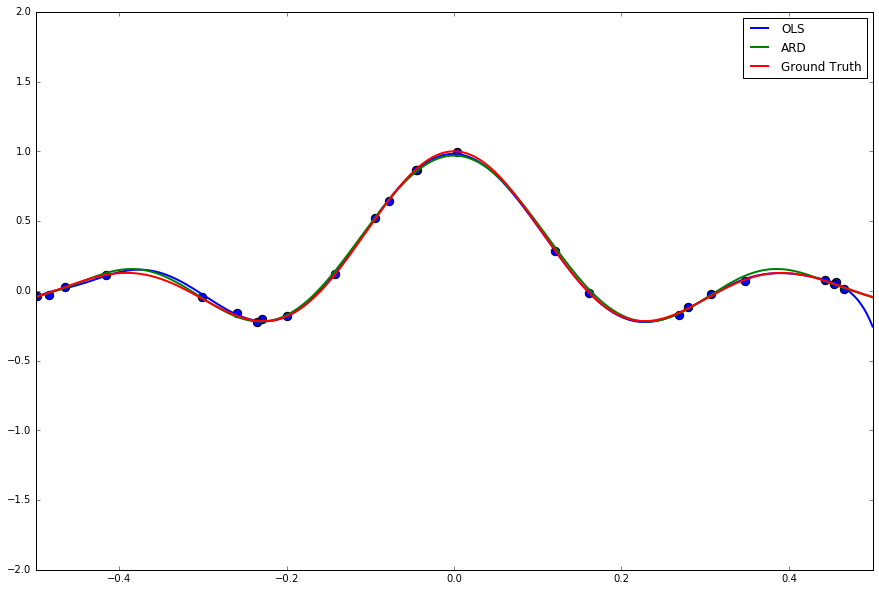

In [4]:
n=np.linspace(-.5,.5,1000).reshape(-1,1)
f_ols=ols_model.predict(n)
f_ard=ARD_model.predict(n)
f_true=np.sinc(2*np.pi*n)

plt.figure(figsize=(15,10))
plt.scatter(x,f,s=70)
plt.plot(n,f_ols,label='OLS',linewidth=2)
plt.plot(n,f_ard,label='ARD',linewidth=2)
plt.plot(n,f_true,label='Ground Truth',linewidth=2)
plt.ylim(-2,2)
plt.xlim(-.5,.5)
plt.legend()
plt.show()

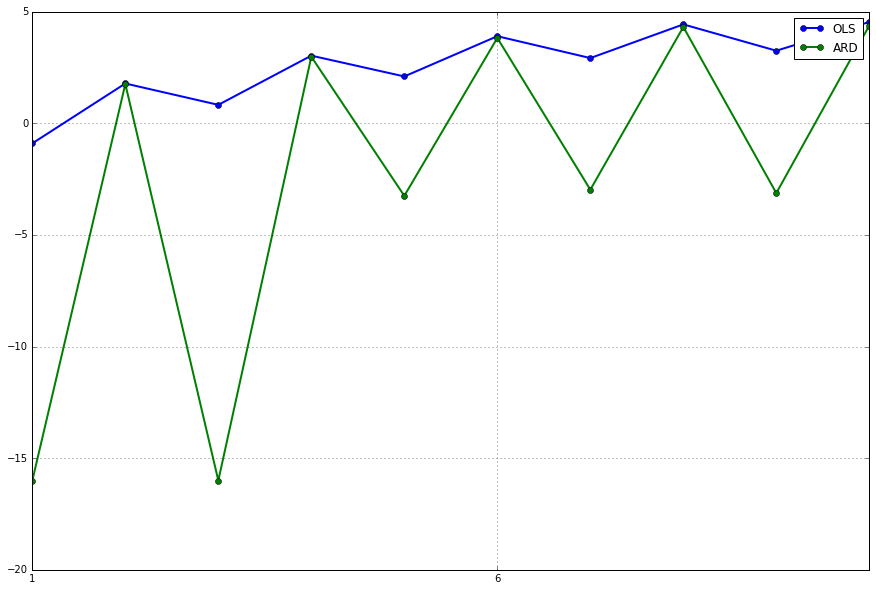

In [5]:
w_ols=ols_model.steps[1][1].coef_
w_ard=ARD_model.steps[1][1].coef_


plt.figure(figsize=(15,10))

L=lambda x: np.log10(np.fabs(x)+1e-16).reshape(-1,1)
d_n=np.arange(1,d+1).reshape(-1,1)
plt.plot(d_n,L(w_ols),'-o',label='OLS',linewidth=2)
plt.plot(d_n,L(w_ard),'-o',label='ARD',linewidth=2)
plt.xticks(range(1,d+1,5),range(1,d+1,5))
plt.xlim(1,d)
plt.legend()
plt.grid()
plt.show()